<a href="https://colab.research.google.com/github/ayushiiii28/Meta-Scifor/blob/main/Glass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Glass Identification Dataset
# Problem Statement:
# The dataset describes the chemical properties of glass and involves classifying samples of glass
# using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in
# 1987. The study of classification of types of glass was motivated by criminological investigation. At
# the scene of the crime, the glass left can be used as evidence...if it is correctly identified!
# The chemical compositions are measured as the weight percent in corresponding oxide.


In [ ]:
# Attribute Information-
# 1. Id number: 1 to 214
# 2. RI: refractive index
# 3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-
# 10)
# 4. Mg: Magnesium
# 5. Al: Aluminum
# 6. Si: Silicon
# 7. K: Potassium
# 8. Ca: Calcium
# 9. Ba: Barium
# 10. Fe: Iron
# 11. Type of glass: (class attribute)
# • 1- building_windows_float_processed
# • 2- building_windows_non_float_processed
# • 3- vehicle_windows_float_processed
# • 4- vehicle_windows_non_float_processed (none in this database)
# • 5- containers
# • 6- tableware
# • 7- headlamps
# There are 214 observations in the dataset. The dataset can be divided into window glass (classes
# 1-4) and non-window glass (classes 5-7).
# Predict : Type of glass

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/usr/glass.csv', header=None)
df.head()
df.columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

# Descriptive statistics
print(df.describe())


               Id          RI          Na          Mg          Al          Si  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean   107.500000    1.518365   13.407850    2.684533    1.444907   72.650935   
std     61.920648    0.003037    0.816604    1.442408    0.499270    0.774546   
min      1.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     54.250000    1.516522   12.907500    2.115000    1.190000   72.280000   
50%    107.500000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    160.750000    1.519157   13.825000    3.600000    1.630000   73.087500   
max    214.000000    1.533930   17.380000    4.490000    3.500000   75.410000   

                K          Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  214.000000  
mean     0.497056    8.956963    0.175047    0.057009    2.780374  
std      0.652192    1.423153    0.497219    0.097439    2.103739 

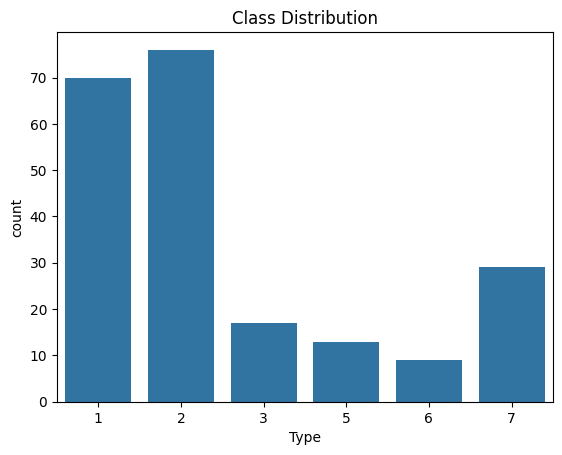

In [8]:
# Class distribution
sns.countplot(x='Type', data=df)
plt.title('Class Distribution')
plt.show()

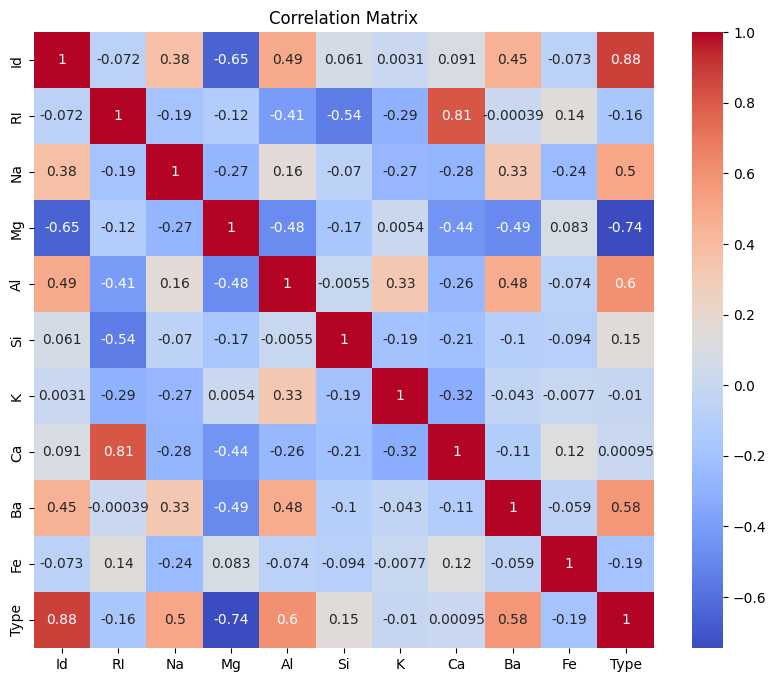

In [7]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
#Data Preprocessing
from sklearn.preprocessing import StandardScaler

# Drop the 'Id' column
df = df.drop('Id', axis=1)

# Check for missing values
print(df.isnull().sum())

# Feature scaling
features = df.drop('Type', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df['Type'] = df['Type']


RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


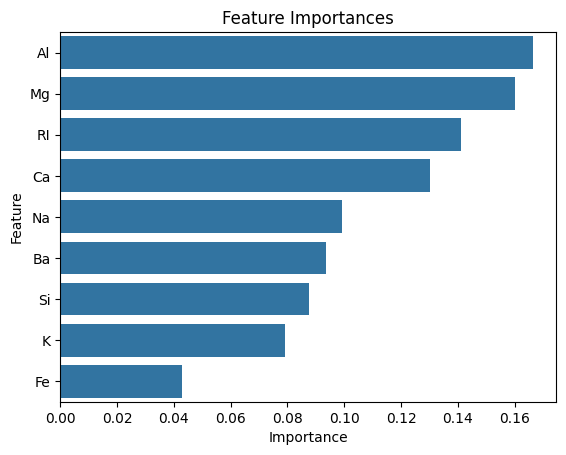

In [11]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Feature Importance using Random Forest
X = scaled_df.drop('Type', axis=1)
y = scaled_df['Type']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

# Optionally, select top N features
selected_features = feature_importances['Feature'].head(5).tolist()
X_selected = X[selected_features]


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'k-NN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"--- {name} ---")
    print(confusion_matrix(y_test, predictions))
    print(classification_report(y_test, predictions))
    print("\n")


--- Logistic Regression ---
[[7 7 0 0 0 0]
 [3 9 0 0 2 1]
 [2 1 0 0 0 0]
 [0 0 0 2 1 0]
 [0 1 0 0 0 1]
 [0 0 0 0 0 6]]
              precision    recall  f1-score   support

           1       0.58      0.50      0.54        14
           2       0.50      0.60      0.55        15
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       0.00      0.00      0.00         2
           7       0.75      1.00      0.86         6

    accuracy                           0.56        43
   macro avg       0.47      0.46      0.46        43
weighted avg       0.54      0.56      0.54        43



--- k-NN ---
[[12  2  0  0  0  0]
 [ 3 12  0  0  0  0]
 [ 3  0  0  0  0  0]
 [ 0  0  0  2  0  1]
 [ 0  1  0  0  0  1]
 [ 0  1  0  0  0  5]]
              precision    recall  f1-score   support

           1       0.67      0.86      0.75        14
           2       0.75      0.80      0.77        15
           3       0.00      0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

--- Random Forest ---
[[12  1  1  0  0  0]
 [ 1 12  0  0  1  1]
 [ 0  0  3  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  1  1]
 [ 0  1  0  0  0  5]]
              precision    recall  f1-score   support

           1       0.92      0.86      0.89        14
           2       0.80      0.80      0.80        15
           3       0.75      1.00      0.86         3
           5       1.00      0.67      0.80         3
           6       0.50      0.50      0.50         2
           7       0.71      0.83      0.77         6

    accuracy                           0.81        43
   macro avg       0.78      0.78      0.77        43
weighted avg       0.82      0.81      0.81        43





In [14]:
#Model Evaluation
from sklearn.model_selection import cross_val_score

# Example for Random Forest
rf = RandomForestClassifier(random_state=42)
scores = cross_val_score(rf, X_selected, y, cv=5, scoring='accuracy')
print(f"Random Forest CV Accuracy: {np.mean(scores):.2f} ± {np.std(scores):.2f}")


Random Forest CV Accuracy: 0.67 ± 0.06


In [20]:
# Example new sample data (scaled already for demonstration purposes)
new_sample = [[1.517, 13.89, 3.60, 1.10, 72.73, 0.64, 8.39, 0.00, 0.24]]

# Ensure the new data is scaled using the same scaler as used for training
new_sample_scaled = scaler.transform(new_sample)

# Select only the important features (same as what was used during model training)
new_sample_selected = pd.DataFrame(new_sample_scaled, columns=features.columns)[selected_features]

# Predict the type of glass for the new sample
predicted_glass_type = model.predict(new_sample_selected)

# Output the prediction result
print("Predicted Type of Glass:", predicted_glass_type[0])


Predicted Type of Glass: 3


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
